# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [10]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import patsy 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn import tree

#import statsmodels.formula.api as smf

%matplotlib inline 

In [11]:
df = pd.read_csv('previsao_de_renda.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   index                  15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12466 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  mau                    15000 non-null  bool   
 15  re

In [13]:
df = df.dropna()
df.drop(columns=['Unnamed: 0','data_ref','index'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12466 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   12466 non-null  object 
 1   posse_de_veiculo       12466 non-null  bool   
 2   posse_de_imovel        12466 non-null  bool   
 3   qtd_filhos             12466 non-null  int64  
 4   tipo_renda             12466 non-null  object 
 5   educacao               12466 non-null  object 
 6   estado_civil           12466 non-null  object 
 7   tipo_residencia        12466 non-null  object 
 8   idade                  12466 non-null  int64  
 9   tempo_emprego          12466 non-null  float64
 10  qt_pessoas_residencia  12466 non-null  float64
 11  mau                    12466 non-null  bool   
 12  renda                  12466 non-null  float64
dtypes: bool(3), float64(3), int64(2), object(5)
memory usage: 1.1+ MB


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

### 1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).

In [14]:
# aumentei o precentual de teste para 30% porque quando coloquei 25% perdi algumas variáveis dummies
#necessárias no dataframe de teste, como por exemplo tipo de renda pensionista
y= df['renda']
x = df.drop('renda',axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.30, random_state=100)
#clf = clf.fit(x_train[['posse_de_veiculo','posse_de_imovel','estado_civil_Married','estado_civil_Separated','estado_civil_Single / not married','estado_civil_Widow']],y_train)


In [15]:
df_train = x_train
df_train['renda']=y_train
df_train


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
4532,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
6424,F,False,False,0,Assalariado,Secundário,Casado,Casa,51,25.547945,2.0,False,5692.00
371,F,False,False,0,Empresário,Secundário,Viúvo,Governamental,47,7.345205,1.0,False,4542.48
1529,F,False,True,0,Assalariado,Secundário,Casado,Casa,61,7.356164,2.0,False,2799.79
3018,M,True,True,2,Assalariado,Secundário,Casado,Casa,39,8.435616,4.0,False,2382.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,F,False,False,0,Assalariado,Secundário,União,Casa,41,13.194521,2.0,False,3420.80
14585,F,True,False,0,Empresário,Secundário,Casado,Casa,28,0.682192,2.0,False,2058.74
9712,F,False,False,0,Empresário,Superior completo,Casado,Casa,30,7.432877,2.0,True,2817.58
8392,M,True,True,0,Empresário,Superior completo,Solteiro,Casa,25,4.035616,1.0,False,2944.05


In [16]:
y, x = patsy.dmatrices('np.log(renda) ~  sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + C(tipo_renda) + C(educacao) + C(estado_civil) + C(tipo_residencia) + idade + tempo_emprego + qt_pessoas_residencia + mau', df_train)

### 2.Rode uma regularização ridge com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o  𝑅2  na base de testes. Qual o melhor modelo?

In [17]:
#Regressão
#no treinamento nos foi mostrado que quando colocamos zero em L1_wt no método elastic_net estariamos rodando pelo método Ridge
#o fato é que quando coloco 0 obtenho o erro descriminado abaixo, desta forma configurei o L1_wt = 0.000000000000001 (quase todo
#o peso no modelo Ridge e funcionou perfeitamente. Podem me explicar porque?
modelo = sm.OLS(y, x).fit_regularized(method= 'elastic_net',L1_wt = 0, refit = True,  alpha = 0)
modelo.summary()

NotImplementedError: 

In [18]:
alphas_aux = [0, 0.001, 0.005, 0.01, 0.05, 0.1] 

In [19]:
for alpha_aux in alphas_aux :
    print(f'Regressão Ridge para alpha = {alpha_aux}')
    modelo = sm.OLS(y, x).fit_regularized(method= 'elastic_net',L1_wt = 0.000000000000001, refit = True,  alpha = alpha_aux)
    print(modelo.summary())
    print('\n')
    print('\n')

Regressão Ridge para alpha = 0
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:32:48   Log-Likelihood:                -9230.4
No. Observations:                8726   AIC:                         1.851e+04
Df Residuals:                    8700   BIC:                         1.871e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Todos os modelos apresentaram o mesmo R2. Não consigo definir um modelo melhor só alterando o parâmetro alpha.

### 3.Faça o mesmo que no passo 2, com uma regressão LASSO. Qual método chega a um melhor resultado?

In [20]:
for alpha_aux in alphas_aux :
    print(f'Regressão Lasso para alpha = {alpha_aux}')
    modelo = sm.OLS(y, x).fit_regularized(method= 'elastic_net',L1_wt = 1, refit = True,  alpha = alpha_aux)
    print(modelo.summary())
    print('\n')
    print('\n')

Regressão Lasso para alpha = 0
                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     113.5
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:32:52   Log-Likelihood:                -9230.4
No. Observations:                8726   AIC:                         1.851e+04
Df Residuals:                    8700   BIC:                         1.871e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

Aparentemente no modelo Lasso conforme vamos aumentando o alpha, o R2 vai diminuindo. Desta forma, o melhor modelo foi o alpha igual a zero considerando o R2. Notei também que o modelo zerou alguns parâmetros, possívelmente porque eles não são significantes para o modelo. Se considerarmos o R2 ajustado e o AIC que considera a simplificação do modelo poderiamos escolher outros modelos que tem um R2 ajustado ligeiramente menor que o do modelo com alpha igual a zero mas bem mais simplificado, como por exemplo o modelo com alpha igual a 0.005 ou 0.01.

### 4.Rode um modelo stepwise. Avalie o  𝑅2  na Base de testes. Qual o melhor resultado?

In [21]:
#criando dummies
df_train_dummies = pd.get_dummies(df_train, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel','tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia','mau'])
df_train_dummies.head(5)


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,sexo_F,sexo_M,posse_de_veiculo_False,posse_de_veiculo_True,posse_de_imovel_False,...,estado_civil_União,estado_civil_Viúvo,tipo_residencia_Aluguel,tipo_residencia_Casa,tipo_residencia_Com os pais,tipo_residencia_Comunitário,tipo_residencia_Estúdio,tipo_residencia_Governamental,mau_False,mau_True
4532,1,36,3.575342,3.0,3369.24,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
6424,0,51,25.547945,2.0,5692.00,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
371,0,47,7.345205,1.0,4542.48,1,0,1,0,1,...,0,1,0,0,0,0,0,1,1,0
1529,0,61,7.356164,2.0,2799.79,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3018,2,39,8.435616,4.0,2382.51,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [22]:
#eliminando colunas dos dummies que não serão utilizadas no modelo e organizando o dataframe
df_train_dummies.drop(columns=['sexo_F', 'posse_de_veiculo_False','posse_de_imovel_False','tipo_renda_Assalariado'
                               , 'educacao_Primário','estado_civil_Casado', 'tipo_residencia_Aluguel','mau_False'], inplace=True)
df_train_dummies= df_train_dummies[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'
                           ,'sexo_M', 'posse_de_veiculo_True', 'posse_de_imovel_True'
                           ,'tipo_renda_Bolsista', 'tipo_renda_Empresário'
                           ,'tipo_renda_Pensionista', 'tipo_renda_Servidor público'
                           ,'educacao_Pós graduação', 'educacao_Secundário'
                           ,'educacao_Superior completo', 'educacao_Superior incompleto'
                           ,'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União'
                           ,'estado_civil_Viúvo', 'tipo_residencia_Casa'
                           ,'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário'
                           ,'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'
                           ,'mau_True','renda']]

In [23]:
#separando em variávies e targets.
X = df_train_dummies.iloc[:, 0:25] 
y = df_train_dummies.iloc[:, 25:]

In [24]:
####Executando o modelo proposto de stepwise
def stepwise_selection(X, y, 
                        initial_list=[], 
                        threshold_in=0.01, 
                        threshold_out = 0.05, 
                        verbose=True):
        """ Perform a forward-backward feature selection 
        based on p-value from statsmodels.api.OLS
        Arguments:
            X - pandas.DataFrame with candidate features
            y - list-like with the target
            initial_list - list of features to start with (column names of X)
            threshold_in - include a feature if its p-value < threshold_in
            threshold_out - exclude a feature if its p-value > threshold_out
            verbose - whether to print the sequence of inclusions and exclusions
        Returns: list of selected features 
        Always set threshold_in < threshold_out to avoid infinite looping.
        See https://en.wikipedia.org/wiki/Stepwise_regression for the details
        """
        included = list(initial_list)
        #print("included")
        #print(included)
       
        while True:
            changed=False
            # forward step
            excluded = list(set(X.columns)-set(included))
            new_pval = pd.Series(index=excluded)
            
            for new_column in excluded:
                model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
                print("modelo 1")
                print(model.summary())
                new_pval[new_column] = model.pvalues[new_column]
                print("new_pval")
                print(new_pval)
                
            best_pval = new_pval.min()
            print("best_pval")
            print(best_pval)      
            if best_pval < threshold_in:
                print("best_pval")
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed=True
                if verbose:
                    print("Entrou")
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
              
            
            #sys.exit()
            # backward step
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
            print("modelo 2")
            print(model.summary())
            # use all coefs except intercept
            pvalues = model.pvalues.iloc[1:]
            worst_pval = pvalues.max() # null if pvalues is empty
            print("worst_pval")
            print(worst_pval) 
            if worst_pval > threshold_out:
                changed=True
                worst_feature = pvalues.idxmax()
                included.remove(worst_feature)
                if verbose:
                    print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
            if not changed:
                break
        return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)


C:\Users\br0hg\AppData\Local\Temp\ipykernel_17420\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     15.00
Date:                Wed, 18 May 2022   Prob (F-statistic):           0.000109
Time:                        15:32:54   Log-Likelihood:                -86632.
No. Observations:                8726   AIC:                         1.733e+05
Df Residuals:                    8724   BIC:                         1.733e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17420\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     896.5
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:32:54   Log-Likelihood:                -85824.
No. Observations:                8726   AIC:                         1.717e+05
Df Residuals:                    8723   BIC:                         1.717e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17420\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     785.4
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:32:55   Log-Likelihood:                -85597.
No. Observations:                8726   AIC:                         1.712e+05
Df Residuals:                    8722   BIC:                         1.712e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17420\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     622.1
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:32:55   Log-Likelihood:                -85545.
No. Observations:                8726   AIC:                         1.711e+05
Df Residuals:                    8721   BIC:                         1.711e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17420\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     507.4
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:32:56   Log-Likelihood:                -85526.
No. Observations:                8726   AIC:                         1.711e+05
Df Residuals:                    8720   BIC:                         1.711e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const      

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17420\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     430.9
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:32:56   Log-Likelihood:                -85507.
No. Observations:                8726   AIC:                         1.710e+05
Df Residuals:                    8719   BIC:                         1.711e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const    

C:\Users\br0hg\AppData\Local\Temp\ipykernel_17420\1252000962.py:28: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


modelo 1
                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     371.0
Date:                Wed, 18 May 2022   Prob (F-statistic):               0.00
Time:                        15:32:56   Log-Likelihood:                -85502.
No. Observations:                8726   AIC:                         1.710e+05
Df Residuals:                    8718   BIC:                         1.711e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const      

In [25]:
#preparando a base de teste para rodar o modelo.
df_test = x_test
df_test['renda']=y_test
df_test


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
11349,M,True,False,0,Assalariado,Superior incompleto,Casado,Com os pais,24,6.032877,2.0,False,4283.18
12462,M,True,False,0,Assalariado,Secundário,Casado,Aluguel,33,0.841096,2.0,False,926.67
377,F,False,False,0,Assalariado,Secundário,Casado,Casa,47,8.967123,2.0,False,1703.33
11232,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,False,4329.86
11526,M,True,False,0,Assalariado,Superior completo,Casado,Casa,50,4.219178,2.0,False,911.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12924,F,False,True,0,Assalariado,Secundário,Casado,Casa,53,3.336986,2.0,False,2553.98
1103,F,False,False,1,Empresário,Secundário,Separado,Casa,29,8.673973,2.0,False,5758.47
5404,M,True,False,2,Assalariado,Secundário,Casado,Casa,43,10.375342,4.0,False,4437.13
12314,M,True,False,0,Empresário,Secundário,Separado,Casa,41,5.665753,1.0,False,6554.63


In [26]:
#criando dummies
df_test_dummies = pd.get_dummies(df_test, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel','tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia','mau'])
df_test_dummies.columns


Index(['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda', 'sexo_F', 'sexo_M', 'posse_de_veiculo_False',
       'posse_de_veiculo_True', 'posse_de_imovel_False',
       'posse_de_imovel_True', 'tipo_renda_Assalariado', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor público', 'educacao_Primário',
       'educacao_Pós graduação', 'educacao_Secundário',
       'educacao_Superior completo', 'educacao_Superior incompleto',
       'estado_civil_Casado', 'estado_civil_Separado', 'estado_civil_Solteiro',
       'estado_civil_União', 'estado_civil_Viúvo', 'tipo_residencia_Aluguel',
       'tipo_residencia_Casa', 'tipo_residencia_Com os pais',
       'tipo_residencia_Comunitário', 'tipo_residencia_Estúdio',
       'tipo_residencia_Governamental', 'mau_False', 'mau_True'],
      dtype='object')

In [27]:
#eliminando colunas dos dummies que não serão utilizadas no modelo e organizando o dataframe
#para o treinaing eliminei do dummie ,'tipo_renda_Pensionista', porem nos dados selecionados
#para teste não havia amostra deste tipo de renda.
df_test_dummies.drop(columns=['sexo_F', 'posse_de_veiculo_False','posse_de_imovel_False','tipo_renda_Assalariado'
                               , 'educacao_Primário','estado_civil_Casado', 'tipo_residencia_Aluguel','mau_False'], inplace=True)
df_test_dummies= df_test_dummies[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia'
                           ,'sexo_M', 'posse_de_veiculo_True', 'posse_de_imovel_True'
                           ,'tipo_renda_Bolsista', 'tipo_renda_Empresário'
                           ,'tipo_renda_Pensionista', 'tipo_renda_Servidor público'
                           ,'educacao_Pós graduação', 'educacao_Secundário'
                           ,'educacao_Superior completo', 'educacao_Superior incompleto'
                           ,'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União'
                           ,'estado_civil_Viúvo', 'tipo_residencia_Casa'
                           ,'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário'
                           ,'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'
                           ,'mau_True','renda']]



In [28]:
#separando em variávies e targets.
X_test = df_test_dummies.iloc[:, 0:25] 
y_test = df_test_dummies.iloc[:, 25:]
X_test=X_test.drop(columns=['qtd_filhos', 'qt_pessoas_residencia'
                           ,'posse_de_veiculo_True' 
                           ,'tipo_renda_Bolsista' 
                           ,'tipo_renda_Pensionista', 'tipo_renda_Servidor público'
                           ,'educacao_Pós graduação', 'educacao_Secundário'
                           ,'educacao_Superior incompleto'
                           ,'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União'
                           ,'estado_civil_Viúvo', 'tipo_residencia_Casa'
                           ,'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário'
                           ,'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'
                           ,'mau_True'])

X_test.columns

Index(['idade', 'tempo_emprego', 'sexo_M', 'posse_de_imovel_True',
       'tipo_renda_Empresário', 'educacao_Superior completo'],
      dtype='object')

In [29]:
#model_test = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
model_test = sm.OLS(y_test,sm.add_constant(pd.DataFrame(X_test))).fit()   
model_test.summary()    
    


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     149.7
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.25e-170
Time:                        15:32:57   Log-Likelihood:                -36489.
No. Observations:                3740   AIC:                         7.299e+04
Df Residuals:                    3733   BIC:                         7.304e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        232.7902    341.169      0.682      0.495    -436.106     901.686
idade                         25.4316      7.832      3.247      0.001      10.076      40.787
tempo_emprego                266.7779     10.667     25.009      0.000     245.863     287.692
sexo_M                      2220.4183    146.670     15.139      0.000    1932.857    2507.979
posse_de_imovel_True         451.3684    142.994      3.157      0.002     171.014     731.723
tipo_renda_Empresário        778.2189    155.658      5.000      0.000     473.036    1083.402
educacao_Superior completo   507.2724    142.177      3.568      0.000     228.519     786.026
==============================================================================
Omnibus:                     3240.601   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           180648.555
Skew:                           3.844   Prob(JB):                         0.00
Kurtosis:                      36.168   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando-se o melhor modelo gerado pelo método stepwise, quando rodamos na base de teste obtemos um R2 pior do que com a base de treino. Ou seja, o R2 conseguido na base de treino é melhor do que na base de teste.

### 5.Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?



Comparando os parâmetros, o melhor modelo foi aquele composto pelos parâmetros tempo_emprego, sexo_M, tipo_renda_Empresário, educacao_Superior completo, idade, posse_de_imovel_True. Podemos observar um p-value abaixo de 0.05 em todos os parâmetrods.

### 6.Partindo dos modelos que você ajustou, tente melhorar o  𝑅2  na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.

In [30]:
#preparando arquivo
df_test_dummies_new = df_test_dummies.copy()
df_test_dummies.drop(columns=['qtd_filhos', 'qt_pessoas_residencia'
                           ,'posse_de_veiculo_True' 
                           ,'tipo_renda_Bolsista' 
                           ,'tipo_renda_Pensionista', 'tipo_renda_Servidor público'
                           ,'educacao_Pós graduação', 'educacao_Secundário'
                           ,'educacao_Superior incompleto'
                           ,'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União'
                           ,'estado_civil_Viúvo', 'tipo_residencia_Casa'
                           ,'tipo_residencia_Com os pais', 'tipo_residencia_Comunitário'
                           ,'tipo_residencia_Estúdio', 'tipo_residencia_Governamental'
                           ,'mau_True'], inplace=True)
df_test_dummies

,idade,tempo_emprego,sexo_M,posse_de_imovel_True,tipo_renda_Empresário,educacao_Superior completo,renda
11349,24,6.032877,1,0,0,0,4283.18
12462,33,0.841096,1,0,0,0,926.67
377,47,8.967123,0,0,0,0,1703.33
11232,45,7.832877,0,1,0,1,4329.86
11526,50,4.219178,1,0,0,1,911.29
...,...,...,...,...,...,...,...
12924,53,3.336986,0,1,0,0,2553.98
1103,29,8.673973,0,0,1,0,5758.47
5404,43,10.375342,1,0,0,0,4437.13
12314,41,5.665753,1,0,1,0,6554.63


In [31]:
#alterando nome das colunas para não deixar espaços...
df_test_dummies.columns =['idade', 'tempo_emprego', 'sexo_M', 'posse_de_imovel_True', 'tipo_renda_Empresário', 'educacao_Superior_completo', 'renda']
df_test_dummies

,idade,tempo_emprego,sexo_M,posse_de_imovel_True,tipo_renda_Empresário,educacao_Superior_completo,renda
11349,24,6.032877,1,0,0,0,4283.18
12462,33,0.841096,1,0,0,0,926.67
377,47,8.967123,0,0,0,0,1703.33
11232,45,7.832877,0,1,0,1,4329.86
11526,50,4.219178,1,0,0,1,911.29
...,...,...,...,...,...,...,...
12924,53,3.336986,0,1,0,0,2553.98
1103,29,8.673973,0,0,1,0,5758.47
5404,43,10.375342,1,0,0,0,4437.13
12314,41,5.665753,1,0,1,0,6554.63


In [32]:
#iniciando primeiro modelo log(renda)
y, X = patsy.dmatrices('np.log(renda) ~  idade + tempo_emprego + sexo_M + posse_de_imovel_True + tipo_renda_Empresário + educacao_Superior_completo', df_test_dummies)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     167.5
Date:                Wed, 18 May 2022   Prob (F-statistic):          4.65e-189
Time:                        15:32:57   Log-Likelihood:                -3977.9
No. Observations:                3740   AIC:                             7970.
Df Residuals:                    3733   BIC:                             8013.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      7.3427      0.057    128.260      0.000       7.231       7.455
idade                          0.0040      0.001      3.040      0.002       0.001       0.007
tempo_emprego                  0.0455      0.002     25.407      0.000       0.042       0.049
sexo_M                         0.4465      0.025     18.144      0.000       0.398       0.495
posse_de_imovel_True           0.0985      0.024      4.103      0.000       0.051       0.146
tipo_renda_Empresário          0.1389      0.026      5.319      0.000       0.088       0.190
educacao_Superior_completo     0.1138      0.024      4.771      0.000       0.067       0.161
==============================================================================
Omnibus:                        0.430   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.806   Jarque-Bera (JB):                0.376
Skew:                          -0.014   Prob(JB):                        0.829
Kurtosis:                       3.040   Cond. No.                         218.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
#iniciando primeiro modelo log(renda) + Log(idade)
y, X = patsy.dmatrices('np.log(renda) ~  np.log(idade) + tempo_emprego + sexo_M + posse_de_imovel_True + tipo_renda_Empresário + educacao_Superior_completo', df_test_dummies)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.17e-188
Time:                        15:32:57   Log-Likelihood:                -3978.8
No. Observations:                3740   AIC:                             7972.
Df Residuals:                    3733   BIC:                             8015.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      6.9759      0.193     36.204      0.000       6.598       7.354
np.log(idade)                  0.1434      0.053      2.719      0.007       0.040       0.247
tempo_emprego                  0.0457      0.002     25.544      0.000       0.042       0.049
sexo_M                         0.4460      0.025     18.103      0.000       0.398       0.494
posse_de_imovel_True           0.0991      0.024      4.131      0.000       0.052       0.146
tipo_renda_Empresário          0.1390      0.026      5.319      0.000       0.088       0.190
educacao_Superior_completo     0.1138      0.024      4.766      0.000       0.067       0.161
==============================================================================
Omnibus:                        0.457   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.796   Jarque-Bera (JB):                0.401
Skew:                          -0.014   Prob(JB):                        0.818
Kurtosis:                       3.042   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
#iniciando primeiro modelo log(renda) + Log(idade) + Log tempo_emprego
y, X = patsy.dmatrices('np.log(renda) ~  np.log(idade) + np.log(tempo_emprego) + sexo_M + posse_de_imovel_True + tipo_renda_Empresário + educacao_Superior_completo', df_test_dummies)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     122.2
Date:                Wed, 18 May 2022   Prob (F-statistic):          1.95e-141
Time:                        15:32:57   Log-Likelihood:                -4088.3
No. Observations:                3740   AIC:                             8191.
Df Residuals:                    3733   BIC:                             8234.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      6.3143      0.194     32.468      0.000       5.933       6.696
np.log(idade)                  0.3198      0.053      6.030      0.000       0.216       0.424
np.log(tempo_emprego)          0.2378      0.012     20.080      0.000       0.215       0.261
sexo_M                         0.4181      0.025     16.528      0.000       0.368       0.468
posse_de_imovel_True           0.0923      0.025      3.735      0.000       0.044       0.141
tipo_renda_Empresário          0.1116      0.027      4.159      0.000       0.059       0.164
educacao_Superior_completo     0.1176      0.025      4.785      0.000       0.069       0.166
==============================================================================
Omnibus:                        1.513   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.469   Jarque-Bera (JB):                1.467
Skew:                           0.025   Prob(JB):                        0.480
Kurtosis:                       3.083   Cond. No.                         72.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
#iniciando primeiro modelo log(renda) + Log(idade)
y, X = patsy.dmatrices('renda ~  np.log(idade) + tempo_emprego + sexo_M + posse_de_imovel_True + tipo_renda_Empresário + educacao_Superior_completo', df_test_dummies)
modelo = sm.OLS(y,X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     149.0
Date:                Wed, 18 May 2022   Prob (F-statistic):          5.44e-170
Time:                        15:32:57   Log-Likelihood:                -36490.
No. Observations:                3740   AIC:                         7.299e+04
Df Residuals:                    3733   BIC:                         7.304e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                  -1930.4276   1148.455     -1.681      0.093   -4182.089     321.234
np.log(idade)                865.5116    314.479      2.752      0.006     248.943    1482.080
tempo_emprego                268.5466     10.658     25.196      0.000     247.650     289.443
sexo_M                      2213.8245    146.825     15.078      0.000    1925.960    2501.689
posse_de_imovel_True         457.2920    143.038      3.197      0.001     176.852     737.732
tipo_renda_Empresário        778.5902    155.720      5.000      0.000     473.286    1083.895
educacao_Superior_completo   505.4589    142.290      3.552      0.000     226.484     784.433
==============================================================================
Omnibus:                     3242.587   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           181054.139
Skew:                           3.847   Prob(JB):                         0.00
Kurtosis:                      36.206   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#
df_test_dummies

,idade,tempo_emprego,sexo_M,posse_de_imovel_True,tipo_renda_Empresário,educacao_Superior_completo,renda
11349,24,6.032877,1,0,0,0,4283.18
12462,33,0.841096,1,0,0,0,926.67
377,47,8.967123,0,0,0,0,1703.33
11232,45,7.832877,0,1,0,1,4329.86
11526,50,4.219178,1,0,0,1,911.29
...,...,...,...,...,...,...,...
12924,53,3.336986,0,1,0,0,2553.98
1103,29,8.673973,0,0,1,0,5758.47
5404,43,10.375342,1,0,0,0,4437.13
12314,41,5.665753,1,0,1,0,6554.63


In [37]:
new_df = df_test_dummies.copy()

new_df

,idade,tempo_emprego,sexo_M,posse_de_imovel_True,tipo_renda_Empresário,educacao_Superior_completo,renda
11349,24,6.032877,1,0,0,0,4283.18
12462,33,0.841096,1,0,0,0,926.67
377,47,8.967123,0,0,0,0,1703.33
11232,45,7.832877,0,1,0,1,4329.86
11526,50,4.219178,1,0,0,1,911.29
...,...,...,...,...,...,...,...
12924,53,3.336986,0,1,0,0,2553.98
1103,29,8.673973,0,0,1,0,5758.47
5404,43,10.375342,1,0,0,0,4437.13
12314,41,5.665753,1,0,1,0,6554.63


In [38]:
new_y = new_df['renda']
new_X = new_df.drop(columns='renda')
new_X

,idade,tempo_emprego,sexo_M,posse_de_imovel_True,tipo_renda_Empresário,educacao_Superior_completo
11349,24,6.032877,1,0,0,0
12462,33,0.841096,1,0,0,0
377,47,8.967123,0,0,0,0
11232,45,7.832877,0,1,0,1
11526,50,4.219178,1,0,0,1
...,...,...,...,...,...,...
12924,53,3.336986,0,1,0,0
1103,29,8.673973,0,0,1,0
5404,43,10.375342,1,0,0,0
12314,41,5.665753,1,0,1,0


In [39]:
modelo = sm.OLS(np.log(new_y),new_X).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  renda   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                          1.510e+04
Date:                Wed, 18 May 2022   Prob (F-statistic):                        0.00
Time:                        15:32:57   Log-Likelihood:                         -7133.8
No. Observations:                3740   AIC:                                  1.428e+04
Df Residuals:                    3734   BIC:                                  1.432e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
idade                          0.1506      0.002     99.817      0.000       0.148       0.154
tempo_emprego                  0.0406      0.004      9.767      0.000       0.032       0.049
sexo_M                         1.4127      0.054     25.933      0.000       1.306       1.519
posse_de_imovel_True           0.7267      0.055     13.307      0.000       0.620       0.834
tipo_renda_Empresário          0.5933      0.060      9.861      0.000       0.475       0.711
educacao_Superior_completo     0.7375      0.054     13.580      0.000       0.631       0.844
==============================================================================
Omnibus:                       19.655   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.882
Skew:                          -0.127   Prob(JB):                     0.000131
Kurtosis:                       2.776   Cond. No.                         97.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Utilizando o modelo do Stepwise como base, fiz vários testes (Exemplos acima) e o melhor foi com log em renda.  Em alguns  casos percebi que o interceptor/contante resultava um p-value alto. Decidi fazer um modelo sem interceptor e obtive um R2 na Base de teste de 0.960, o melhor de todos. Posso fazer isto? Isto está fazendo com que eu tenha um "overfitting" no modelo ?

### 7. Ajuste uma árvore de regressão e veja se consegue um  𝑅2  melhor com ela.

In [40]:
#Organizando dados
y_train_arv= df_train_dummies['renda']
x_train_arv= df_train_dummies.copy()
x_train_arv.drop(columns=['renda'],inplace=True)


In [41]:
regr_1=DecisionTreeRegressor(max_depth=20)
regr_1.fit(x_train_arv, y_train_arv)
mse_1 = regr_1.score(x_train_arv, y_train_arv)

template = "O MSE da árvore com profundidade = {0} é {1:.2f}" 
print(template.format(regr_1.get_depth(),mse_1).replace(".",","))


O MSE da árvore com profundidade = 20 é 0,71


Text(0, 0.5, 'Impureza Total das Folhas')

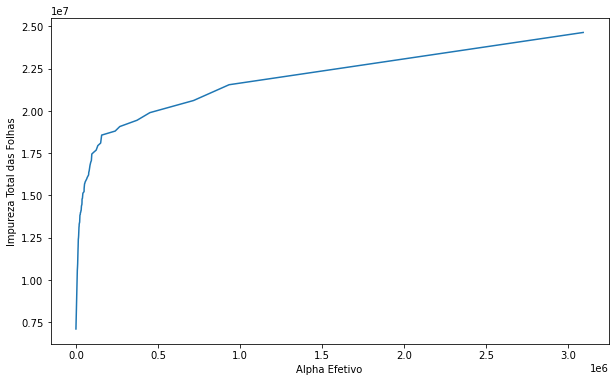

In [42]:
#Calcule o caminho indicado pelos CCP-alfas dessa árvore


path = regr_1.cost_complexity_pruning_path(x_train_arv,y_train_arv)
#path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha Efetivo")
plt.ylabel("Impureza Total das Folhas")

In [43]:
#treinando a arvore para os alphas obtidos
clfs= []
for ccp_alpha in ccp_alphas:
    clf= DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train_arv, y_train_arv)
    clfs.append(clf)

In [44]:
#preparando arquivo
y_test_arv= df_test_dummies_new['renda']
x_test_arv= df_test_dummies_new.copy()
x_test_arv.drop(columns=['renda'],inplace=True)

In [45]:
# calculando o MSE para cada arvore
train_scores = [mean_squared_error(y_train_arv, clf.predict(x_train_arv)) for clf in clfs]
test_scores = [mean_squared_error(y_test_arv, clf.predict(x_test_arv)) for clf in clfs]

<function matplotlib.pyplot.show(close=None, block=None)>

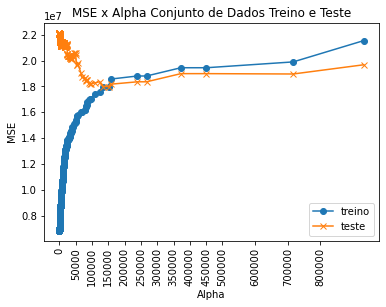

In [46]:
#montando o gráfico e escolhendo ponto próximo do mínimo 
fig, ax= plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x Alpha Conjunto de Dados Treino e Teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker = 'o', label = "treino")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker = 'x', label = "teste")
plt.xticks([0, 50000, 100000, 150000, 200000, 250000,300000,350000,400000, 450000, 500000, 600000, 700000, 800000], rotation=90)
ax.legend()

plt.show


In [47]:
#Calculando o R-quadrado dessa árvore encontrada no item acima
arvore_final = DecisionTreeRegressor(random_state=0, ccp_alpha=140000)
arvore_final.fit(x_train_arv,y_train_arv)
print(f"Profundidade:{arvore_final.tree_.max_depth}")
print(f"R-quadrado na base de teste:{arvore_final.score(x_test_arv,y_test_arv):.2f}")
print(f"MSE na base de teste:{mean_squared_error(y_test_arv, arvore_final.predict(x_test_arv)):.2f}")


Profundidade:7
R-quadrado na base de teste:0.17
MSE na base de teste:17993767.57


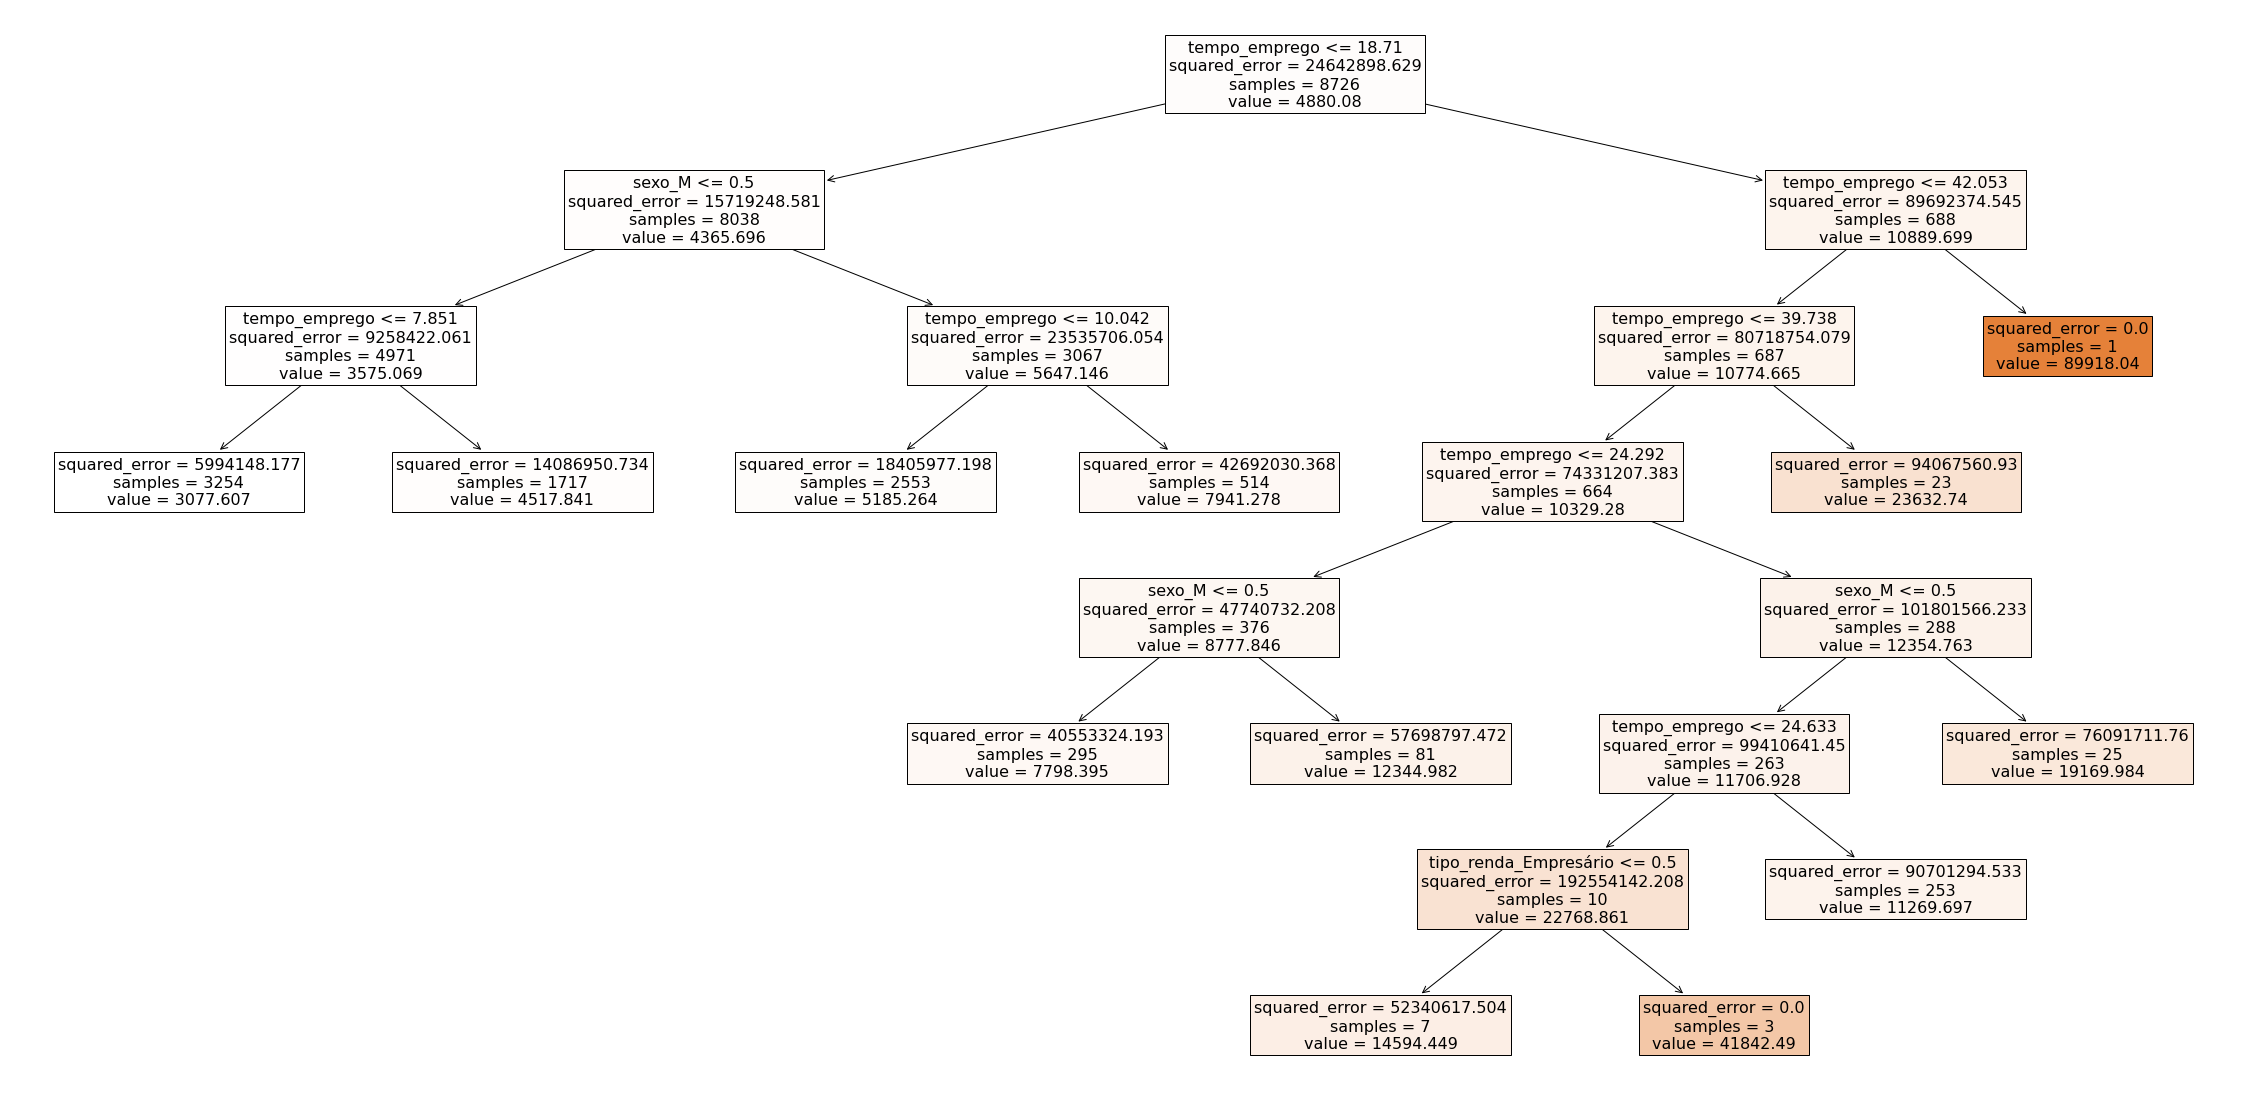

In [48]:
#Visualizando a arvore
plt.rc('figure',figsize=(40,20))
tp = tree.plot_tree(arvore_final,feature_names=x_train_arv.columns,filled=True, fontsize=16)

Ajustei a árvore mas consegui um R2 de 0.170 que é menor do que consegui com o modelo Stepwise.